# Fraudulent Claim Detection

<img src="https://raw.githubusercontent.com/katonic-dev/Katonic-ML-Marketplace/master/Fraudulent%20Claim%20Detection/fraud-claim-detection.jpg?token=AQS2G3NHC7QXZU573HF3JALBZ3UQW" style="width: 1000px;"/>

## Introduction
While Business Rule Management Systems (BRMS) will always be required as they implement mandatory rules related to compliance, AI has the ability to supplement these systems by improving the accuracy of predicting which incoming claims are fraudulent.

By learning from historical cases of fraud and their associated features, AI applies its learnings to new claims to assess whether they fall under the same fraudulent patterns. Unlike BRMS, which are static and have hard-coded rules, AI generates a probabilistic prediction and gives transparency on the unique drivers of fraud for each suspicious claim.

This allows investigators to not only route and triage claims by their likelihood of fraud, but also enables them to accelerate the review process as they know which vectors of a claim they should evaluate. The probabilistic predictions also allow investigators to set thresholds that automatically approve or reject claims.

## Data Preparation


In this section we explore the structure of our data:

1. To understand the input space of the data set
2. And to prepare the sets for exploratory and prediction tasks as described in above

### Import Libraries

In [1]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [10]:
df = pd.read_csv('fraudulent_claim_insurance.csv', delimiter=',')
df.head()

,ID,FRAUD,DATE,POLICY_LENGTH,LOCALITY,REGION,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,CLAIM_POLICY_DIFF_D,CLAIM_POLICY_DIFF_E,POLICY_CLAIM_DAY_DIFF,DISTINCT_PARTIES_ON_CLAIM,CLM_AFTER_RNWL,NOTIF_AFT_RENEWAL,CLM_DURING_CAX,COMPLAINT,CLM_before_PAYMENT,PROP_before_CLM,NCD_REC_before_CLM,NOTIF_DELAY,ACCIDENT_NIGHT,NUM_PI_CLAIM,NEW_VEHICLE_BEFORE_CLAIM,PERSONAL_INJURY_INDICATOR,CLAIM_TYPE_ACCIDENT,CLAIM_TYPE_FIRE,CLAIM_TYPE_MOTOR_THEFT,CLAIM_TYPE_OTHER,CLAIM_TYPE_WINDSCREEN,LOCAL_TEL_MATCH,LOCAL_M_CLM_ADD_MATCH,LOCAL_M_CLM_PERS_MATCH,LOCAL_NON_CLM_ADD_MATCH,LOCAL_NON_CLM_PERS_MATCH,federal_TEL_MATCH,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT,RULE_MATCHES,CLAIM_DESCRIPTION
0,1,0,NaN,12 month,OX29,OX,1,0,0,0,1,0,94.0,4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,this via others themselves inc become within o...
1,3,1,31/01/2013,12 month,LN2,LN,1,1,0,0,0,0,5.0,21,0,0,0,0,0,0,1,0,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,indeed none you to somehow call whereas anyhow...
2,4,1,NaN,12 month,SL6,SL,1,1,0,0,0,0,7.0,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,1,am not fire same now over whence therein right...
3,6,0,31/01/2014,12 month,LA4,LA,0,0,0,0,0,1,178.0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nor put see not seems serious is herself motor...
4,9,0,31/07/2013,12 month,CM8,CM,1,0,0,0,1,0,147.5,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,more being third us part but found neither not...


In [11]:
print(f"Shape of the Data Set: {df.shape}")

Shape of the Data Set: (8610, 45)


## Exploratory Data Analysis
Here our main interest is to get an understanding as to how the given attributes relate to the 'Fraud' status.

In [12]:
# check which columns contain NaN values
df.columns[df.isna().any()].tolist()

['DATE', 'LOCALITY', 'REGION']

The columns `DATE`, `LOCALITY` and `REGION` contain **NaN** values

In [13]:
# Check columns list and missing values
df.isnull().sum()

ID                               0
FRAUD                            0
DATE                          3428
POLICY_LENGTH                    0
LOCALITY                         8
REGION                           8
GENDER                           0
CLAIM_POLICY_DIFF_A              0
CLAIM_POLICY_DIFF_B              0
CLAIM_POLICY_DIFF_C              0
CLAIM_POLICY_DIFF_D              0
CLAIM_POLICY_DIFF_E              0
POLICY_CLAIM_DAY_DIFF            0
DISTINCT_PARTIES_ON_CLAIM        0
CLM_AFTER_RNWL                   0
NOTIF_AFT_RENEWAL                0
CLM_DURING_CAX                   0
COMPLAINT                        0
CLM_before_PAYMENT               0
PROP_before_CLM                  0
NCD_REC_before_CLM               0
NOTIF_DELAY                      0
ACCIDENT_NIGHT                   0
NUM_PI_CLAIM                     0
NEW_VEHICLE_BEFORE_CLAIM         0
PERSONAL_INJURY_INDICATOR        0
CLAIM_TYPE_ACCIDENT              0
CLAIM_TYPE_FIRE                  0
CLAIM_TYPE_MOTOR_THE

The columns `DATE`, `LOCALITY` and `REGION` columns contain **NULL** values

In [14]:
# Handling missing Nan values
df = df[df["REGION"].notna()]

In [15]:
# Check unique values
df.nunique()

ID                            8602
FRAUD                            2
DATE                            13
POLICY_LENGTH                    3
LOCALITY                      2118
REGION                         127
GENDER                           2
CLAIM_POLICY_DIFF_A              2
CLAIM_POLICY_DIFF_B              2
CLAIM_POLICY_DIFF_C              2
CLAIM_POLICY_DIFF_D              2
CLAIM_POLICY_DIFF_E              2
POLICY_CLAIM_DAY_DIFF          365
DISTINCT_PARTIES_ON_CLAIM       24
CLM_AFTER_RNWL                   2
NOTIF_AFT_RENEWAL                2
CLM_DURING_CAX                   2
COMPLAINT                        2
CLM_before_PAYMENT               1
PROP_before_CLM                  2
NCD_REC_before_CLM               2
NOTIF_DELAY                      2
ACCIDENT_NIGHT                   2
NUM_PI_CLAIM                    12
NEW_VEHICLE_BEFORE_CLAIM         2
PERSONAL_INJURY_INDICATOR        2
CLAIM_TYPE_ACCIDENT              2
CLAIM_TYPE_FIRE                  2
CLAIM_TYPE_MOTOR_THE

- The columns `ID` , `CLAIM_DESCRIPTION` are unique for each record in the data set.
- The columns `DATE` and `LOCALITY` are insignificant for training a fraud detection model

Columns `DATE`, `ID`, `LOCALITY`, `CLAIM_DESCRIPTION`, `CLM_before_PAYMENT` are not required for our use case.

In [16]:
df = df.drop(["DATE", "ID","LOCALITY", "CLAIM_DESCRIPTION","CLM_before_PAYMENT"], axis=1)

In [17]:
print(f"Shape of the Data Set: {df.shape}")

Shape of the Data Set: (8602, 40)


After removing the columns and NaN values, The dataset contains 8602 rows and 41 columns.

In [18]:
df.query("FRAUD == 1")["FRAUD"].count()

1404

In [19]:
df.query("FRAUD == 0")["FRAUD"].count()

7198

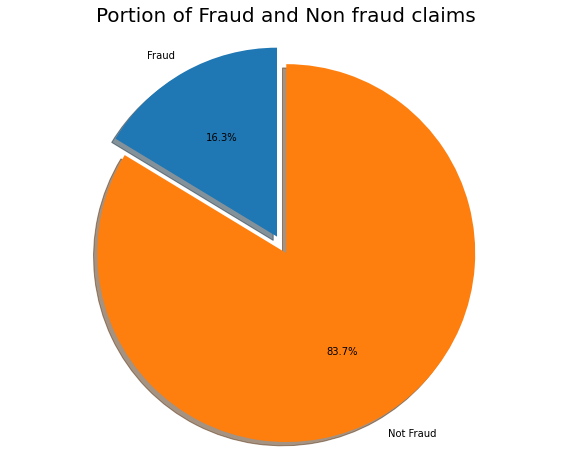

In [20]:
# Fraud and Non Fraud examples
labels = 'Fraud', 'Not Fraud'
sizes = [df.FRAUD[df['FRAUD']==1].count(), df.FRAUD[df['FRAUD']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Portion of Fraud and Non fraud claims", size = 20)
plt.show()

**16.3%** of our data set contains fraudulent claims

In [21]:
len(df.REGION.unique())

127

In [22]:
region_grp = df.groupby('REGION')

In [23]:
# FRAUD vs POLICY_LENGTH
temp_df = df[df["FRAUD"] == 1]
temp_df = temp_df
#sns.countplot(x='POLICY_LENGTH', hue = 'FRAUD',data = temp_df)

fig = px.bar(temp_df, x='POLICY_LENGTH', y='FRAUD')
fig.show()

In [24]:
df2 = df.groupby('FRAUD').agg({'NUM_PI_CLAIM': 'mean', 'DISTINCT_PARTIES_ON_CLAIM': 'mean'}).reset_index()
df2['FRAUD'] = df2['FRAUD'].apply(lambda is_fraud: 'FRAUD' if is_fraud == 1.0 else 'NOT FRAUD')

In [25]:

labels = list(df2["FRAUD"])

fig = go.Figure(data=[
    go.Bar(name='NUM_PI_CLAIM', x=labels, y=list(df2["NUM_PI_CLAIM"])),
    go.Bar(name='DISTINCT_PARTIES_ON_CLAIM', x=labels, y = list(df2["DISTINCT_PARTIES_ON_CLAIM"]))
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()


In [26]:
import plotly.express as px
df1 = df.where(df['FRAUD'] == 1).groupby('REGION').agg({'FRAUD': 'count'})
df2 = df.where(df['FRAUD'] == 0).groupby('REGION').agg({'FRAUD': 'count'})
df_perc = (df1/(df2+df1))
df_perc = df_perc.reset_index()
fig = px.bar(df_perc, x='REGION', y='FRAUD')
fig.show()

## Data Preparation For Model Fitting

In [28]:
for col in list(df.columns) :
    print(col + ": " + str(df[col].unique()))
    print()

FRAUD: [0 1]

POLICY_LENGTH: ['12 month' '6 month' '9 month']

REGION: ['OX' 'LN' 'SL' 'LA' 'CM' 'BT' 'NR' 'NE' 'M' 'SR' 'BB' 'IP' 'TR' 'FK' 'HU'
 'BS' 'B' 'ME' 'CF' 'EX' 'NG' 'PO' 'CH' 'WV' 'SA' 'N' 'EH' 'SG' 'E' 'YO'
 'BA' 'BR' 'S' 'BH' 'LL' 'IV' 'PE' 'LS' 'BD' 'TA' 'PA' 'DN' 'MK' 'AB' 'AL'
 'SY' 'CR' 'NP' 'WS' 'WN' 'SE' 'HG' 'CO' 'PL' 'WA' 'CW' 'LE' 'WF' 'SS'
 'BL' 'SO' 'KA' 'L' 'SM' 'G' 'TQ' 'KY' 'TW' 'HX' 'DH' 'RM' 'DT' 'TN' 'PR'
 'HA' 'GU' 'BN' 'W' 'NN' 'TS' 'SN' 'WD' 'KT' 'IM' 'DY' 'DL' 'CB' 'ML' 'TD'
 'LU' 'HP' 'FY' 'DA' 'ST' 'DE' 'EN' 'PH' 'WR' 'CA' 'RH' 'HD' 'OL' 'TF'
 'RG' 'UB' 'SK' 'CV' 'CT' 'GL' 'DG' 'DD' 'IG' 'HR' 'SW' 'SP' 'KW' 'NW'
 'LD' 'EW' 'JE' 'HS' 'NC' 'GY' 'ECY' 'WG' 'ZE' 'ECR']

GENDER: [1 0]

CLAIM_POLICY_DIFF_A: [0 1]

CLAIM_POLICY_DIFF_B: [0 1]

CLAIM_POLICY_DIFF_C: [0 1]

CLAIM_POLICY_DIFF_D: [1 0]

CLAIM_POLICY_DIFF_E: [0 1]

POLICY_CLAIM_DAY_DIFF: [ 94.    5.    7.  178.  147.5  70.5  18.  181.  122.5 140.5  44.5  32.
 179.5  97.   35.  133.  129.5  80.   1

In [30]:
cats = [
    col
    for col in list(df.columns)
    if str(df[col].unique()) in ["[0 1]", "[1 0]"]
]

In [31]:
# For the one hot variables, we change 0 to -1 
# so that the models can capture a negative relation where the attribute is inapplicable instead of 0
for cat_col in cats :
    df.loc[df[cat_col] == 0, cat_col] = -1

In [32]:
df.head()

,FRAUD,POLICY_LENGTH,REGION,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,CLAIM_POLICY_DIFF_D,CLAIM_POLICY_DIFF_E,POLICY_CLAIM_DAY_DIFF,DISTINCT_PARTIES_ON_CLAIM,CLM_AFTER_RNWL,NOTIF_AFT_RENEWAL,CLM_DURING_CAX,COMPLAINT,PROP_before_CLM,NCD_REC_before_CLM,NOTIF_DELAY,ACCIDENT_NIGHT,NUM_PI_CLAIM,NEW_VEHICLE_BEFORE_CLAIM,PERSONAL_INJURY_INDICATOR,CLAIM_TYPE_ACCIDENT,CLAIM_TYPE_FIRE,CLAIM_TYPE_MOTOR_THEFT,CLAIM_TYPE_OTHER,CLAIM_TYPE_WINDSCREEN,LOCAL_TEL_MATCH,LOCAL_M_CLM_ADD_MATCH,LOCAL_M_CLM_PERS_MATCH,LOCAL_NON_CLM_ADD_MATCH,LOCAL_NON_CLM_PERS_MATCH,federal_TEL_MATCH,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT,RULE_MATCHES
0,-1,12 month,OX,1,-1,-1,-1,1,-1,94.0,4,-1,-1,-1,-1,-1,1,-1,-1,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1
1,1,12 month,LN,1,1,-1,-1,-1,-1,5.0,21,-1,-1,-1,-1,-1,1,-1,-1,7,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,1
2,1,12 month,SL,1,1,-1,-1,-1,-1,7.0,5,-1,-1,-1,-1,-1,-1,1,-1,0,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,2,0,1
3,-1,12 month,LA,-1,-1,-1,-1,-1,1,178.0,1,1,1,-1,-1,-1,1,-1,-1,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1
4,-1,12 month,CM,1,-1,-1,-1,1,-1,147.5,1,-1,-1,-1,-1,-1,1,1,-1,0,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,-1


In [33]:
continuous_vars = ['POLICY_CLAIM_DAY_DIFF' , 'DISTINCT_PARTIES_ON_CLAIM' , 'NUM_PI_CLAIM']
oneHots = ['POLICY_LENGTH', 'REGION' , 'SCR_LOCAL_RULE_COUNT','SCR_NAT_RULE_COUNT']
df = df[['FRAUD'] + continuous_vars + cats[1:]+ oneHots]
df.head() 

,FRAUD,POLICY_CLAIM_DAY_DIFF,DISTINCT_PARTIES_ON_CLAIM,NUM_PI_CLAIM,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,CLAIM_POLICY_DIFF_D,CLAIM_POLICY_DIFF_E,CLM_AFTER_RNWL,NOTIF_AFT_RENEWAL,CLM_DURING_CAX,COMPLAINT,PROP_before_CLM,NCD_REC_before_CLM,NOTIF_DELAY,ACCIDENT_NIGHT,NEW_VEHICLE_BEFORE_CLAIM,PERSONAL_INJURY_INDICATOR,CLAIM_TYPE_ACCIDENT,CLAIM_TYPE_FIRE,CLAIM_TYPE_MOTOR_THEFT,CLAIM_TYPE_OTHER,CLAIM_TYPE_WINDSCREEN,LOCAL_TEL_MATCH,LOCAL_M_CLM_ADD_MATCH,LOCAL_M_CLM_PERS_MATCH,LOCAL_NON_CLM_ADD_MATCH,LOCAL_NON_CLM_PERS_MATCH,federal_TEL_MATCH,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,RULE_MATCHES,POLICY_LENGTH,REGION,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT
0,-1,94.0,4,0,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,12 month,OX,0,0
1,1,5.0,21,7,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,12 month,LN,0,0
2,1,7.0,5,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,1,12 month,SL,2,0
3,-1,178.0,1,0,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,12 month,LA,0,0
4,-1,147.5,1,0,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,12 month,CM,0,0


In [34]:
remove = []
for i in oneHots:
    if df[i].dtype in [np.str, np.object]:
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,-1)
        remove.append(i)
df = df.drop(remove, axis=1)
df.head()

,FRAUD,POLICY_CLAIM_DAY_DIFF,DISTINCT_PARTIES_ON_CLAIM,NUM_PI_CLAIM,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,CLAIM_POLICY_DIFF_D,CLAIM_POLICY_DIFF_E,CLM_AFTER_RNWL,NOTIF_AFT_RENEWAL,CLM_DURING_CAX,COMPLAINT,PROP_before_CLM,NCD_REC_before_CLM,NOTIF_DELAY,ACCIDENT_NIGHT,NEW_VEHICLE_BEFORE_CLAIM,PERSONAL_INJURY_INDICATOR,CLAIM_TYPE_ACCIDENT,CLAIM_TYPE_FIRE,CLAIM_TYPE_MOTOR_THEFT,CLAIM_TYPE_OTHER,CLAIM_TYPE_WINDSCREEN,LOCAL_TEL_MATCH,LOCAL_M_CLM_ADD_MATCH,LOCAL_M_CLM_PERS_MATCH,LOCAL_NON_CLM_ADD_MATCH,LOCAL_NON_CLM_PERS_MATCH,federal_TEL_MATCH,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,RULE_MATCHES,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT,POLICY_LENGTH_12 month,POLICY_LENGTH_6 month,POLICY_LENGTH_9 month,REGION_OX,REGION_LN,REGION_SL,REGION_LA,REGION_CM,REGION_BT,REGION_NR,REGION_NE,REGION_M,REGION_SR,REGION_BB,REGION_IP,REGION_TR,REGION_FK,REGION_HU,REGION_BS,REGION_B,REGION_ME,REGION_CF,REGION_EX,REGION_NG,REGION_PO,REGION_CH,REGION_WV,REGION_SA,REGION_N,REGION_EH,REGION_SG,REGION_E,REGION_YO,REGION_BA,REGION_BR,REGION_S,REGION_BH,REGION_LL,REGION_IV,REGION_PE,REGION_LS,REGION_BD,REGION_TA,REGION_PA,REGION_DN,REGION_MK,REGION_AB,REGION_AL,REGION_SY,REGION_CR,REGION_NP,REGION_WS,REGION_WN,REGION_SE,REGION_HG,REGION_CO,REGION_PL,REGION_WA,REGION_CW,REGION_LE,REGION_WF,REGION_SS,REGION_BL,REGION_SO,REGION_KA,REGION_L,REGION_SM,REGION_G,REGION_TQ,REGION_KY,REGION_TW,REGION_HX,REGION_DH,REGION_RM,REGION_DT,REGION_TN,REGION_PR,REGION_HA,REGION_GU,REGION_BN,REGION_W,REGION_NN,REGION_TS,REGION_SN,REGION_WD,REGION_KT,REGION_IM,REGION_DY,REGION_DL,REGION_CB,REGION_ML,REGION_TD,REGION_LU,REGION_HP,REGION_FY,REGION_DA,REGION_ST,REGION_DE,REGION_EN,REGION_PH,REGION_WR,REGION_CA,REGION_RH,REGION_HD,REGION_OL,REGION_TF,REGION_RG,REGION_UB,REGION_SK,REGION_CV,REGION_CT,REGION_GL,REGION_DG,REGION_DD,REGION_IG,REGION_HR,REGION_SW,REGION_SP,REGION_KW,REGION_NW,REGION_LD,REGION_EW,REGION_JE,REGION_HS,REGION_NC,REGION_GY,REGION_ECY,REGION_WG,REGION_ZE,REGION_ECR
0,-1,94.0,4,0,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,5.0,21,7,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,7.0,5,0,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,1,2,0,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,178.0,1,0,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

In [35]:
# Min-Max scaling the continuous variables
minVec = df[continuous_vars].min().copy()
maxVec = df[continuous_vars].max().copy()
df[continuous_vars] = (df[continuous_vars]-minVec)/(maxVec-minVec)
df.head()

,FRAUD,POLICY_CLAIM_DAY_DIFF,DISTINCT_PARTIES_ON_CLAIM,NUM_PI_CLAIM,GENDER,CLAIM_POLICY_DIFF_A,CLAIM_POLICY_DIFF_B,CLAIM_POLICY_DIFF_C,CLAIM_POLICY_DIFF_D,CLAIM_POLICY_DIFF_E,CLM_AFTER_RNWL,NOTIF_AFT_RENEWAL,CLM_DURING_CAX,COMPLAINT,PROP_before_CLM,NCD_REC_before_CLM,NOTIF_DELAY,ACCIDENT_NIGHT,NEW_VEHICLE_BEFORE_CLAIM,PERSONAL_INJURY_INDICATOR,CLAIM_TYPE_ACCIDENT,CLAIM_TYPE_FIRE,CLAIM_TYPE_MOTOR_THEFT,CLAIM_TYPE_OTHER,CLAIM_TYPE_WINDSCREEN,LOCAL_TEL_MATCH,LOCAL_M_CLM_ADD_MATCH,LOCAL_M_CLM_PERS_MATCH,LOCAL_NON_CLM_ADD_MATCH,LOCAL_NON_CLM_PERS_MATCH,federal_TEL_MATCH,federal_CLM_ADD_MATCH,federal_CLM_PERS_MATCH,federal_NON_CLM_ADD_MATCH,federal_NON_CLM_PERS_MATCH,RULE_MATCHES,SCR_LOCAL_RULE_COUNT,SCR_NAT_RULE_COUNT,POLICY_LENGTH_12 month,POLICY_LENGTH_6 month,POLICY_LENGTH_9 month,REGION_OX,REGION_LN,REGION_SL,REGION_LA,REGION_CM,REGION_BT,REGION_NR,REGION_NE,REGION_M,REGION_SR,REGION_BB,REGION_IP,REGION_TR,REGION_FK,REGION_HU,REGION_BS,REGION_B,REGION_ME,REGION_CF,REGION_EX,REGION_NG,REGION_PO,REGION_CH,REGION_WV,REGION_SA,REGION_N,REGION_EH,REGION_SG,REGION_E,REGION_YO,REGION_BA,REGION_BR,REGION_S,REGION_BH,REGION_LL,REGION_IV,REGION_PE,REGION_LS,REGION_BD,REGION_TA,REGION_PA,REGION_DN,REGION_MK,REGION_AB,REGION_AL,REGION_SY,REGION_CR,REGION_NP,REGION_WS,REGION_WN,REGION_SE,REGION_HG,REGION_CO,REGION_PL,REGION_WA,REGION_CW,REGION_LE,REGION_WF,REGION_SS,REGION_BL,REGION_SO,REGION_KA,REGION_L,REGION_SM,REGION_G,REGION_TQ,REGION_KY,REGION_TW,REGION_HX,REGION_DH,REGION_RM,REGION_DT,REGION_TN,REGION_PR,REGION_HA,REGION_GU,REGION_BN,REGION_W,REGION_NN,REGION_TS,REGION_SN,REGION_WD,REGION_KT,REGION_IM,REGION_DY,REGION_DL,REGION_CB,REGION_ML,REGION_TD,REGION_LU,REGION_HP,REGION_FY,REGION_DA,REGION_ST,REGION_DE,REGION_EN,REGION_PH,REGION_WR,REGION_CA,REGION_RH,REGION_HD,REGION_OL,REGION_TF,REGION_RG,REGION_UB,REGION_SK,REGION_CV,REGION_CT,REGION_GL,REGION_DG,REGION_DD,REGION_IG,REGION_HR,REGION_SW,REGION_SP,REGION_KW,REGION_NW,REGION_LD,REGION_EW,REGION_JE,REGION_HS,REGION_NC,REGION_GY,REGION_ECY,REGION_WG,REGION_ZE,REGION_ECR
0,-1,0.516484,0.142857,0.000000,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,0.027473,0.750000,0.388889,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,0,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,0.038462,0.178571,0.000000,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,1,2,0,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,-1,0.978022,0.035714,0.000000,-1,-1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,

## Model fitting and selection

In [36]:
X = df.drop(['FRAUD'], axis = 1)
Y = df['FRAUD']

In [37]:
import evalml
from evalml.automl import AutoMLSearch
problem_type = 'binary'

X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, Y, problem_type = problem_type, test_size=.2)

# perform a search across multiple pipelines and hyperparameters
automl = AutoMLSearch(X_train, y_train, problem_type=problem_type)
automl.search()

In [38]:
# the best pipeline is already refitted on the entire training data
best_pipeline = automl.best_pipeline
best_pipeline.predict(X_test)

1838   -1
3179   -1
3713   -1
5299    1
5034   -1
3698   -1
7286   -1
3904   -1
4434   -1
1974   -1
28     -1
2663    1
1703   -1
4656    1
3898   -1
985    -1
2205    1
738    -1
2907   -1
7973   -1
5355   -1
1798   -1
3675   -1
3942   -1
7982   -1
5014   -1
6404    1
5005   -1
6629   -1
6522   -1
141     1
3728   -1
7969   -1
4222   -1
7992   -1
6954   -1
7295   -1
2274   -1
2673   -1
4928   -1
3925   -1
8432   -1
4935   -1
336    -1
2312   -1
1784   -1
6161    1
6545    1
5094   -1
5715   -1
4155    1
7369    1
6476   -1
5160   -1
8458   -1
3124   -1
7618   -1
7093   -1
780    -1
6513   -1
671    -1
6364   -1
8183   -1
5794   -1
6151   -1
6245    1
6713   -1
6855   -1
5728    1
7011    1
872    -1
4547   -1
4212   -1
7469   -1
6632   -1
6114   -1
1923    1
8170   -1
4321   -1
711     1
3521   -1
5026   -1
7328   -1
2887   -1
4482    1
5105   -1
7477    1
5381   -1
6296   -1
4087   -1
5174   -1
71      1
2744   -1
700    -1
6759    1
3701   -1
239    -1
7242    1
992    -1
2615   -1


In [39]:
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Classifier w/ Label Encoder + Imputer ...,3,0.225288,0.014079,0.236319,96.003280,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,4,LightGBM Classifier w/ Label Encoder + Imputer...,4,0.240646,0.020342,0.256171,95.730831,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.248219,0.011175,0.255918,95.596481,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.252910,0.008437,0.260861,95.513263,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,2,Logistic Regression Classifier w/ Label Encode...,2,0.255459,0.014042,0.264928,95.468031,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,8,Extra Trees Classifier w/ Label Encoder + Impu...,8,0.274153,0.006253,0.280824,95.136393,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.364137,0.050731,0.347615,93.540047,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,5,CatBoost Classifier w/ Label Encoder + Imputer...,5,0.455568,0.001651,0.457357,91.918021,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,0,5.636832,0.008078,5.630995,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [40]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


***************************************************************
* XGBoost Classifier w/ Label Encoder + Imputer + Oversampler *
***************************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. Oversampler
	 * sampling_ratio : 0.25
	 * k_neighbors_default : 5
	 * n_jobs : -1
	 * sampling_ratio_dict : None
	 * k_neighbors : 5
4. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 11.0 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.236   

In [41]:
scores = best_pipeline.score(X_test, y_test,  objectives=["auc"])
print(scores['AUC'])

0.9294113285883749


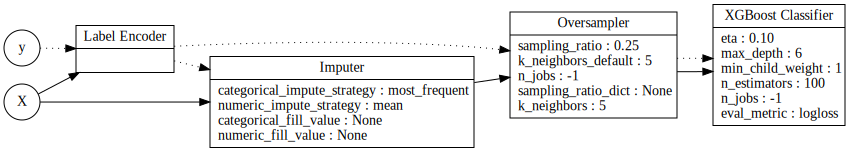

In [42]:
best_pipeline.graph()